# Modularization and Documentation

Now that we've covered some of the basic syntax and libraries in Python we can start to tackle our data analysis problem.
We are interested in understanding the relationship between the weather and the number of mosquitos so that we can plan mosquito control measures.
Since we want to apply these mosquito control measures at a number of different sites we need to understand how the relationship varies across sites.
Remember that we have a series of CSV files with each file containing the data for a single location.

## Objectives

* Write code for people, not computers
* Break a program into chunks
* Write and use functions in Python
* Write useful documentation

## Starting small

When approaching computational tasks like this one it is typically best to start small,
check each piece of code as you go,
and make incremental changes.
This helps avoid marathon debugging sessions
because it's much easier to debug one small piece of the code at a time than to write 100 lines of code and
then try to figure out all of the different bugs in it.

Let's start by reading in the data from a single file and conducting a simple regression analysis on it.

In fact, I would actually start by just importing the data and making sure that everything is coming in OK.

In [4]:
import pandas as pd

In [5]:
data=pd.read_csv('A2_mosquito_data.csv')

In [6]:
print data.head()

   year  temperature  rainfall  mosquitos
0  1960           82       200        180
1  1961           70       227        194
2  1962           89       231        207
3  1963           74       114        121
4  1964           78       147        140


In [7]:
data['temperature']=(data['temperature']-32) * 5/9.0
print data.head()

   year  temperature  rainfall  mosquitos
0  1960    27.777778       200        180
1  1961    21.111111       227        194
2  1962    31.666667       231        207
3  1963    23.333333       114        121
4  1964    25.555556       147        140


In [8]:
import statsmodels.api as sm

In [10]:
import statsmodels.api as sm

regr_results = sm.OLS.from_formula('mosquitos ~ temperature + rainfall', data).fit()
regr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mosquitos   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     7889.
Date:                Wed, 26 Aug 2015   Prob (F-statistic):           3.68e-61
Time:                        16:39:54   Log-Likelihood:                -111.54
No. Observations:                  51   AIC:                             229.1
Df Residuals:                      48   BIC:                             234.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      17.5457      2.767      6.341      0.000        11.983    23.109
temperature     0.8719      0.092      9.457      0.000         0.687     1.057
rainfall        0.6967      0.006    125.385      0.000         0.686     0.708
==============================================================================
Omnibus:                        1.651   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                0.906
Skew:                          -0.278   Prob(JB):                        0.636
Kurtosis:                       3.343   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Functions

The next thing we need to do is loop over all of the possible data files,
but in order to do that we're going to need to grow our code some more.
Since our brain can only easily hold 5-7 pieces of information at once,
and our code already has more than that many pieces,
we need to start breaking our code into manageable sized chunks.
This will let us read and understand the code more easily and make it easier to reuse pieces of our code.
We'll do this using functions.

Functions in Python take the general form

~~~python
def function_name(inputs):
    do stuff
    return output
~~~

So, if we want to write a function that returns the value of a number squared we could use:

In [11]:
def square(x):
    x_squared = x ** 2
    return x_squared



In [14]:
print square(-3)

9


In [15]:
two_squared=square(2)

In [16]:
print two_squared

4


### Challenges

1\. Write a function that converts temperature from Fahrenheit to Celsius and use it to replace

~~~python
data['temperature'] = (data['temperature'] - 32) * 5 / 9.0
~~~

in our program.

2\. Write a function called `analyze()` that takes `data` as an input, performs the regression, makes the observed-predicted plot, and returns `parameters`.

*Walk through someone's result.
When discussing talk about different names.
E.g., fahr_to_celsius is better than temp_to_celsius since it is explicit both the input and the output.
Talk about the fact that even though this doesn't save us any lines of code it's still easier to read.*

In [18]:
def fahr_to_celcius(tempF):
    tempC = (tempF - 32) * 5/9.0
    return tempC

original = 32.0
final = fahr_to_celcius(original)

print final

0.0


In [19]:
print tempC

NameError: name 'tempC' is not defined

## The call stack

Let's take a closer look at what happens when we call fahr_to_celsius(32.0). To make things clearer, we'll start by putting the initial value 32.0 in a variable and store the final result in one as well:

#### Call Stack (Initial State)

When the first three lines of this function are executed the function is created,
but nothing happens.
The function is like a recipe,
it contains the information about how to do something,
but it doesn't do so until you explicitly ask it to.
We then create the variable `original` and assign the value 32.0 to it.
The values `tempF` and `tempC` don't currently exist. 

#### Call Stack Immediately After Function Call

When we call `fahr_to_celsius`,
Python creates another stack frame to hold fahr_to_celsius's variables.
Upon creation this stack frame only includes the inputs being passed to the function,
so in our case `tempF`.
As the function is executed variables created by the function are stored in the functions stack frame,
so `tempC` is created in the `fahr_to_celsius` stack frame.

#### Call Stack At End Of Function Call

When the call to `fahr_to_celsius` returns a value,
Python throws away `fahr_to_celsius`'s stack frame,
including all of the variables it contains,
and creates a new variable
in the original stack frame to hold the temperature in Celsius.

#### Call Stack After End

This final stack frame is always there;
it holds the variables we defined outside the functions in our code.
What it doesn't hold is the variables that were in the other stack frames.
If we try to get the value of `tempF` or `tempC` after our functions have finished running,
Python tells us that there's no such thing:


## Testing Functions

Once we start putting things into functions so that we can re-use them,
we need to start testing that those functions are working correctly.
The most basic thing we can do is some informal testing to make sure the function is doing what it is supposed to do.
To see how to do this, let's write a function to center the values in a dataset prior to conducting statistical analysis. 
Centering means setting the mean of each variable to be the same value, typically zero.

In [20]:
def centre_data(data):
    return data - data.mean()



In [22]:
import pandas as pd

test_data = pd.DataFrame([[1,1], [1,2]])

print test_data

   0  1
0  1  1
1  1  2


In [24]:
print centre_data(test_data)

   0    1
0  0 -0.5
1  0  0.5


## Documentation

OK, the `center` function seems to be working fine.
Does anyone else see anything that's missing before we move on?

Yes, we should write some [documentation](../../gloss.html#documentation)
to remind ourselves later what it's for and how to use it.
This function may be fairly straightforward,
but in most cases it won't be so easy to remember exactly what a function is doing in a few months.
Just imagine looking at our `analyze` function a few months in the future
and trying to remember exactly what it was doing just based on the code.

The usual way to put documentation in code is to add [comments](../../gloss.html#comment) like this:

In [25]:

def centre_data(data):
    """centre_data(data): returns a centred data set"""
    return data - data.mean()


In [26]:
help (centre_data)

Help on function centre_data in module __main__:

centre_data(data)
    centre_data(data): returns a centred data set



### Challenge

1. Test your temperature conversion function to make sure it's working
   (think about some temperatures that you easily know the conversion for).
2. Add documentation to both the temperature conversation function and the analysis function.

## Looping over files

So now our code looks something like this:

Intercept      17.545739
temperature     0.871943
rainfall        0.696717
dtype: float64


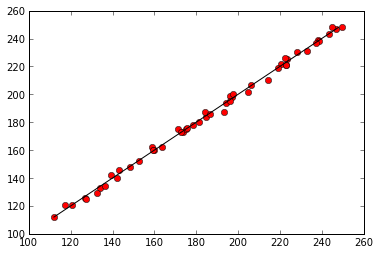

In [25]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def fahr_to_celsius(tempF):
    """Convert fahrenheit to celsius"""
    tempC = (tempF - 32) * 5 / 9.0
    return tempC

def analyze(data):
    """Perform regression analysis on mosquito data
    
    Takes a dataframe as input that includes columns named 'temperature',
    'rainfall', and 'mosquitos'.
    
    Performs a multiple regression to predict the number of mosquitos.
    Creates an observed-predicted plot of the result and
    returns the parameters of the regression.
    
    """
    regr_results = sm.OLS.from_formula('mosquitos ~ temperature + rainfall', data).fit()
    parameters = regr_results.params
    predicted = parameters[0] + parameters[1] * data['temperature'] + parameters[2] * data['rainfall']
    plt.figure()
    plt.plot(predicted, data['mosquitos'], 'ro')
    min_mosquitos, max_mosquitos = min(data['mosquitos']), max(data['mosquitos'])
    plt.plot([min_mosquitos, max_mosquitos], [min_mosquitos, max_mosquitos], 'k-')
    return parameters

data = pd.read_csv('A2_mosquito_data.csv')
data['temperature'] = fahr_to_celsius(data['temperature'])
regr_results = analyze(data)
print parameters

Now we want to loop over all of the possible data files,
and to do that we need to know their names.
If we only had a dozen files we could write them all down,
but if we have hundreds of files or the filenames change then that won't really work.
Fortunately Python has a built in library to help us find the files we want to work with called `glob`.

### Challenge

Modify your code to loop over all of the files in your directory,
making an observed-predicted plot for each file and printing the parameters.